In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [35]:
X=pd.read_csv("../data/Genes/data.csv")

In [36]:
y=pd.read_csv("../data/Genes/labels.csv")

In [37]:
X.shape

(801, 20532)

In [38]:
X=X.iloc[:,1:]

In [39]:
y=y.iloc[:,1:]

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5 MB


In [41]:
np.flatnonzero(np.sum(pd.isnull(X))>0)

array([], dtype=int64)

In [42]:
np.flatnonzero(X.std()==0).shape

(267,)

In [10]:
X=X.drop(X.std()[X.std()==0].index.values,axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])

In [13]:
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder())
])

In [14]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

In [15]:
categorical_features = X.select_dtypes(include=['object']).columns

In [16]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
]) 

In [17]:
from IPython.display import Image
Image(url= "../data/Genes/clus.png")

In [18]:
X_pre=preprocessor.fit_transform(X)

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [24]:
range_n_clusters = [3, 4, 5, 6, 7, 8]

In [26]:
for i in [0.9,0.95,0.98]:
    pca = PCA(n_components=i)
    X_pca=pca.fit_transform(X_pre)
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_pca)
        silhouette_avg = silhouette_score(X_pca, cluster_labels)
        print(
        "var =",
        i,
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    

var = 0.9 For n_clusters = 3 The average silhouette_score is : 0.12213050721268999
var = 0.9 For n_clusters = 4 The average silhouette_score is : 0.1354488675564315
var = 0.9 For n_clusters = 5 The average silhouette_score is : 0.15768335664099392
var = 0.9 For n_clusters = 6 The average silhouette_score is : 0.15846310167763136
var = 0.9 For n_clusters = 7 The average silhouette_score is : 0.16463614669596532
var = 0.9 For n_clusters = 8 The average silhouette_score is : 0.13245955831449469
var = 0.95 For n_clusters = 3 The average silhouette_score is : 0.11525728608401746
var = 0.95 For n_clusters = 4 The average silhouette_score is : 0.12545703150755702
var = 0.95 For n_clusters = 5 The average silhouette_score is : 0.14739864590374133
var = 0.95 For n_clusters = 6 The average silhouette_score is : 0.14401081433830623
var = 0.95 For n_clusters = 7 The average silhouette_score is : 0.1519568175675471
var = 0.95 For n_clusters = 8 The average silhouette_score is : 0.13785473572149615


In [33]:
for i in [100,300,400,800]:
    kpca = KernelPCA(n_components=i,kernel="rbf")
    Xk_pca=kpca.fit_transform(X_pre)
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(Xk_pca)
        silhouette_avg = silhouette_score(Xk_pca, cluster_labels)
        print(
        "var =",
        i,
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        
    )
    kpca = KernelPCA()
    

var = 100 For n_clusters = 3 The average silhouette_score is : 0.14270271371403065
var = 100 For n_clusters = 4 The average silhouette_score is : 0.1454820969202855
var = 100 For n_clusters = 5 The average silhouette_score is : 0.16137673057708188
var = 100 For n_clusters = 6 The average silhouette_score is : 0.16332304897616254
var = 100 For n_clusters = 7 The average silhouette_score is : 0.14558278969848065
var = 100 For n_clusters = 8 The average silhouette_score is : 0.14880425057849683
var = 300 For n_clusters = 3 The average silhouette_score is : 0.07384301458326743
var = 300 For n_clusters = 4 The average silhouette_score is : 0.08632266335501725
var = 300 For n_clusters = 5 The average silhouette_score is : 0.10178443303757828
var = 300 For n_clusters = 6 The average silhouette_score is : 0.10666199834967435
var = 300 For n_clusters = 7 The average silhouette_score is : 0.1037582636881619
var = 300 For n_clusters = 8 The average silhouette_score is : 0.08566354439723439
var = 

In [28]:
for i in [100,300,400,800]:
    anova = SelectKBest(f_classif,k=i)
    X_anova=anova.fit_transform(X_pre,np.ravel(y))
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_anova)
        silhouette_avg = silhouette_score(X_anova, cluster_labels)
        print(
        "var =",
        i,
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        
    )

var = 100 For n_clusters = 3 The average silhouette_score is : 0.49345044146910105
var = 100 For n_clusters = 4 The average silhouette_score is : 0.5681870722361623
var = 100 For n_clusters = 5 The average silhouette_score is : 0.5760105604459409
var = 100 For n_clusters = 6 The average silhouette_score is : 0.5053353043748623
var = 100 For n_clusters = 7 The average silhouette_score is : 0.46195801260337466
var = 100 For n_clusters = 8 The average silhouette_score is : 0.2792862381777601
var = 300 For n_clusters = 3 The average silhouette_score is : 0.4224474002221801
var = 300 For n_clusters = 4 The average silhouette_score is : 0.4911105036812013
var = 300 For n_clusters = 5 The average silhouette_score is : 0.4807819240065035
var = 300 For n_clusters = 6 The average silhouette_score is : 0.4161383730268902
var = 300 For n_clusters = 7 The average silhouette_score is : 0.32149483273720936
var = 300 For n_clusters = 8 The average silhouette_score is : 0.2846662742179023
var = 400 For

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)

In [31]:
X_pca=pca.fit_transform(X_pre)

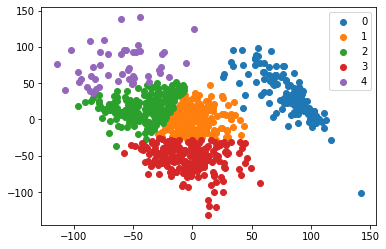

In [32]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X_pca)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
    plt.legend()